# Skills Network

## Create visualizations using Matplotlib, Seaborn and Folium

**Estimated time needed:** 40 minutes

In this assignment, you will demonstrate the skills you have acquired in creating visualizations using **Matplotlib**, **Seaborn**, and **Folium**.

> After each task you are required to save your plots as an image or screenshot using the filenames specified. You will be uploading these images during your final project submission so they can be evaluated by your peers.

---

## Table of Contents
1. [Objectives](#objectives)
2. [Setup](#setup)  
   A. [Installing Required Libraries](#installing-required-libraries)  
   B. [Importing Required Libraries](#importing-required-libraries)  
3. [Scenario](#scenario)  
   A. [Data Description](#data-description)  
4. [Importing Data](#importing-data)  
5. [Creating Visualizations for Data Analysis](#creating-visualizations-for-data-analysis)

---

## Objectives
- Create line, bar, scatter, and box plots using **Matplotlib** and **Seaborn**.
- Create an interactive map using **Folium**.
- Save figures with the exact filenames required for submission.

---

## Setup

### Installing Required Libraries
> Skip any that are already installed in your environment.
> `bash
pip install pandas matplotlib seaborn folium
```

### Importing Required Libraries


In [8]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

--
# Automobile Sales Visualization Assignment

## Scenario
You are tasked with analyzing **historical_automobile_sales** data to understand the historical trends in automobile sales during recession and non-recession periods.

### Recession Periods
- 1980  
- 1981â€“1982  
- 1991  
- 2000â€“2001  
- 2007â€“2009  
- 2020 (Covid-19 Impact)  

---

## Data Description
The dataset (`historical_automobile_sales.csv`) contains the following variables:

1. **Date** â€” date of the observation (monthly).  
2. **Recession** â€” binary flag (1: recession, 0: normal).  
3. **Automobile_Sales** â€” number of vehicles sold during the period.  
4. **GDP** â€” per capita GDP value (USD).  
5. **Unemployment_Rate** â€” monthly unemployment rate.  
6. **Consumer_Confidence** â€” synthetic index representing consumer confidence.  
7. **Seasonality_Weight** â€” weight representing seasonality effects.  
8. **Price** â€” average vehicle price during the period.  
9. **Advertising_Expenditure** â€” companyâ€™s advertising expenditure.  
10. **Vehicle_Type** â€” type of vehicles sold (Superminicar, Smallfamilycar, Mediumfamilycar, Executivecar, Sports).  
11. **Competition** â€” measure of competition in the market (e.g., number of competitors).  
12. **Month** â€” month of the observation (extracted from Date).  
13. **Year** â€” year of the observation (extracted from Date).  



---

## Importing Data



In [11]:
import requests
from io import StringIO

# url
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

response = requests.get(url)
data = StringIO(response.text)

# read data
df = pd.read_csv(data)

print(df.head())

        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Automobile_Sales     Vehicle_Type        City 

In [12]:
df .describe()

Year   Recession  Consumer_Confidence  Seasonality_Weight  \
count   528.000000  528.000000           528.000000          528.000000   
mean   2001.500000    0.214015           101.140170            0.575795   
std      12.710467    0.410526            10.601154            0.454477   
min    1980.000000    0.000000            73.900000            0.000000   
25%    1990.750000    0.000000            94.035000            0.250000   
50%    2001.500000    0.000000           100.740000            0.500000   
75%    2012.250000    0.000000           108.240000            0.750000   
max    2023.000000    1.000000           131.670000            1.500000   

              Price  Advertising_Expenditure  Competition         GDP  \
count    528.000000               528.000000   528.000000  528.000000   
mean   24964.991956              3067.456439     6.064394   40.073903   
std     4888.073433              1139.564637     1.968350   16.249714   
min     8793.663000              1009.000000     3.000000   12.508000   
25%    21453.300500              2083.500000     4.000000   27.237500   
50%    25038.691500              3072.000000     6.000000   39.214500   
75%    28131.684750              4067.250000     8.000000   53.506500   
max    44263.657000              4983.000000     9.000000   70.374000   

       Growth_Rate  unemployment_rate  Automobile_Sales  
count   528.000000         528.000000        528.000000  
mean     -0.242001           2.453977       2352.718068  
std       0.861268           1.119019       1645.321284  
min      -4.227601           1.000000        102.000000  
25%      -0.574049           1.600000        793.950000  
50%      -0.013162           2.300000       2182.600000  
75%       0.388932           2.900000       3614.800000  
max       0.815074           6.000000      21147.000000

In [13]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

## Creating Visualizations for Data Analysis

### Task 1 â€” Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year
*Save as:* **Line_plot_1.png**


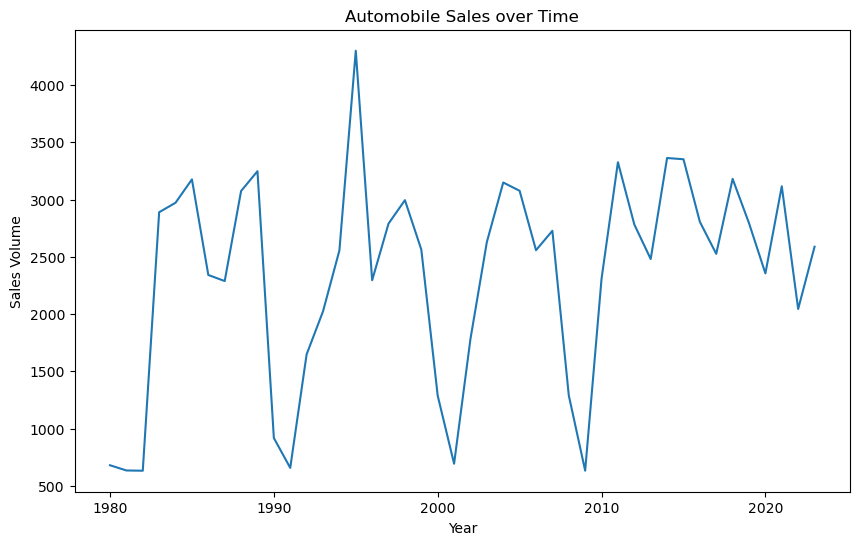

In [15]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales over Time')
plt.show()

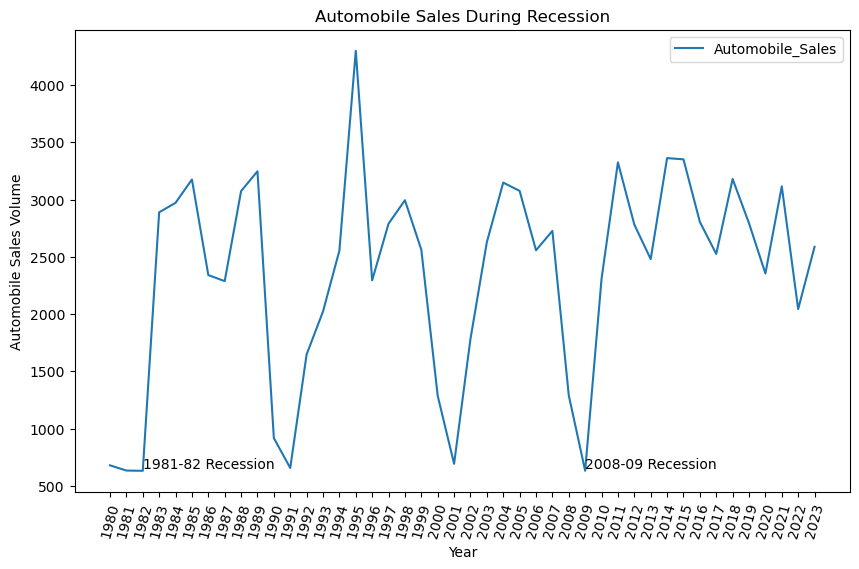

In [16]:
plt.figure(figsize=(10, 6))
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
df_line.plot(kind = 'line')
plt.xticks(list(range(df['Year'].min(),df['Year'].max()+1)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Automobile Sales Volume')
plt.title('Automobile Sales During Recession')
plt.text(1982, 650, '1981-82 Recession')
plt.text(2009, 650, '2008-09 Recession')
plt.legend()
plt.show()

### Task 2 â€” Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?
*Save as:* **Boxplot_1.png**

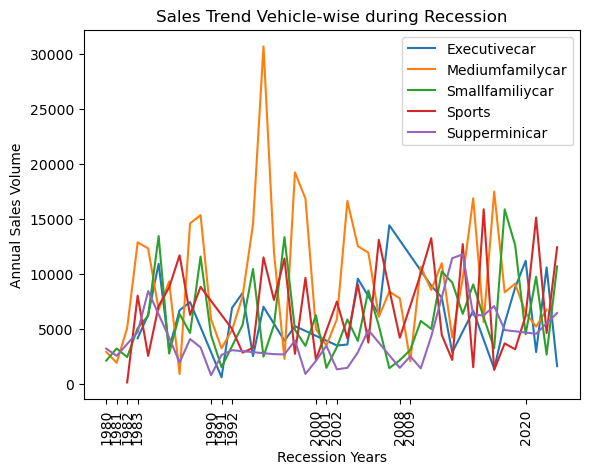

In [17]:
df_recession = df[df['Recession'] == 1]
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
recession_years = list(df[df['Recession'] == 1].Year.unique())
plt.xticks(recession_years, rotation = 90)
plt.xlabel('Recession Years')
plt.ylabel('Annual Sales Volume')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

### Task 3 â€” Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

*Save as:* **Scatter_1.png**


<function matplotlib.pyplot.show(close=None, block=None)>

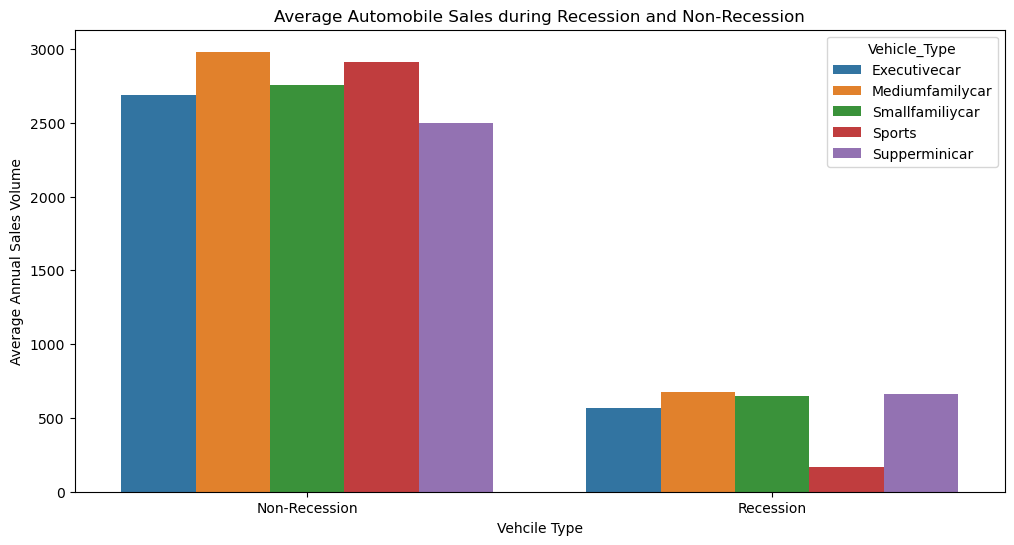

In [18]:
new_df = df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type',  data=new_df)
plt.xlabel('Vehcile Type')
plt.ylabel('Average Annual Sales Volume')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show

### Task 4 â€” Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
*Save as:* **Heatmap_1.png**



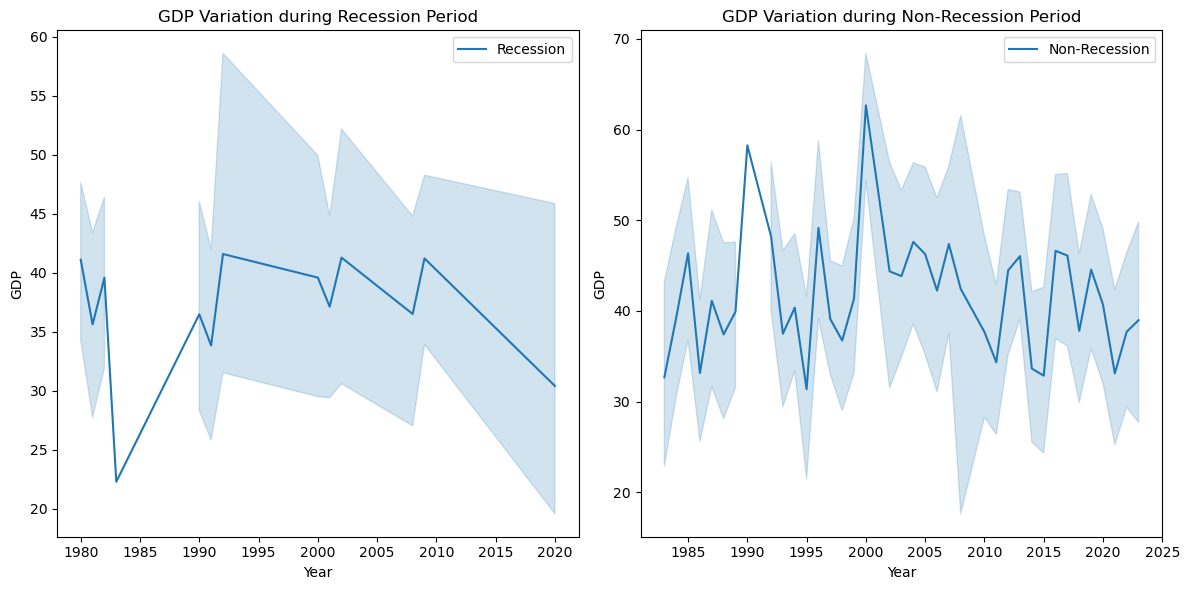

In [20]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

fig=plt.figure(figsize=(12, 6))
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1 , 2, 2) # add subplot 2 (1 row, 2 columns, second plot). 

sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

### Task 5 â€”  Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
*Save as:* **Map_1.html**

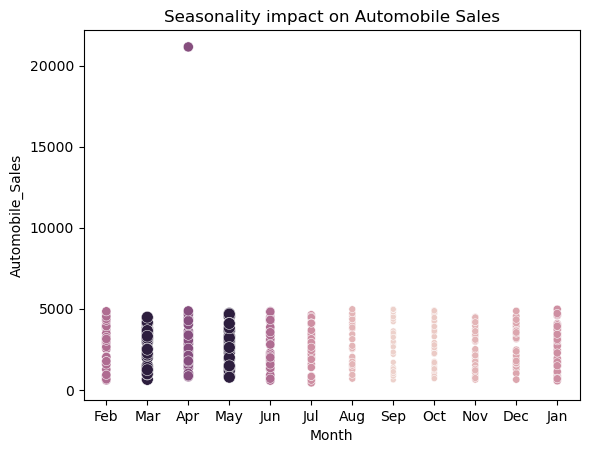

In [21]:
non_rec_data = df[df['Recession'] == 0]
size=non_rec_data['Seasonality_Weight'] #for bubble effect
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight', legend=False)
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')
plt.show()

### Task 6 â€” Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period?.


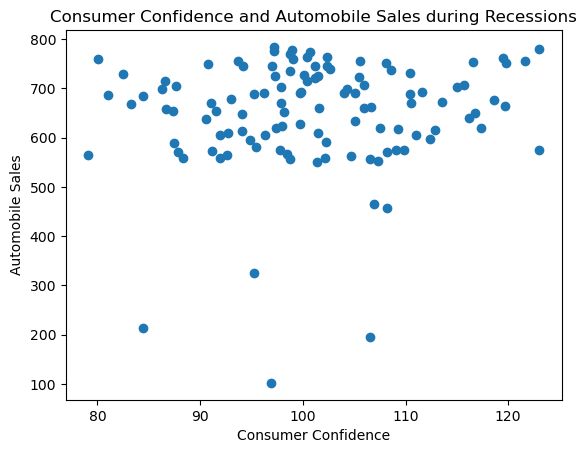

In [22]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

How does the average vehicle price relate to the sales volume during recessions?


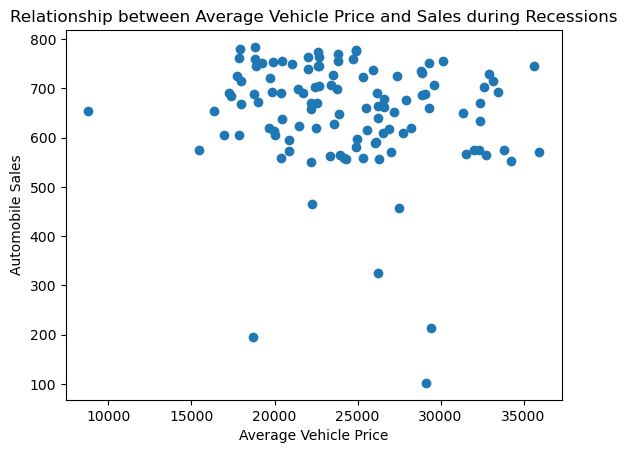

In [23]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])

plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

### Task 1.7 â€” Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

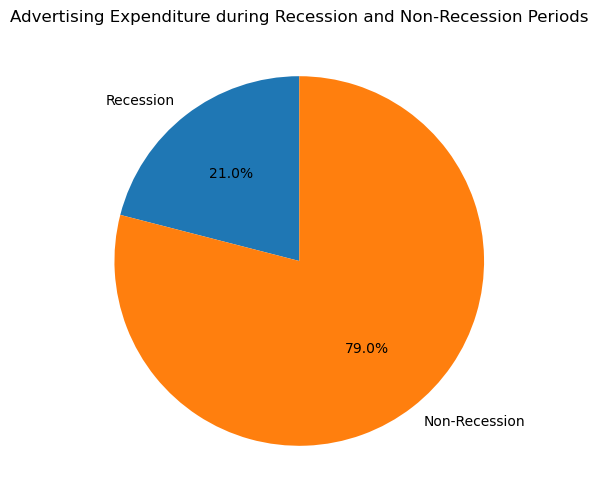

In [27]:
# Separate the data into Recession and Non-Recession
Rdata = df[df['Recession'] == 1]   # Recession period
NRdata = df[df['Recession'] == 0]  # Non-Recession period

# Calculate total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for advertising expenditure
plt.figure(figsize=(8,6))
labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Advertising Expenditure during Recession and Non-Recession Periods")
plt.show()

### Task 1.8 â€”  Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

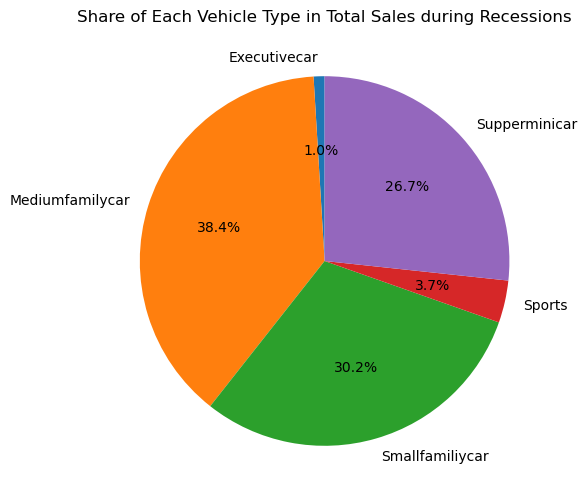

In [28]:
# Filter the data 
Rdata = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTsales = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total sales during recessions
plt.figure(figsize=(8, 6))

labels = VTsales.index
sizes = VTsales.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Each Vehicle Type in Total Sales during Recessions')

plt.show()

### Task 1.9 â€” Develop a countplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

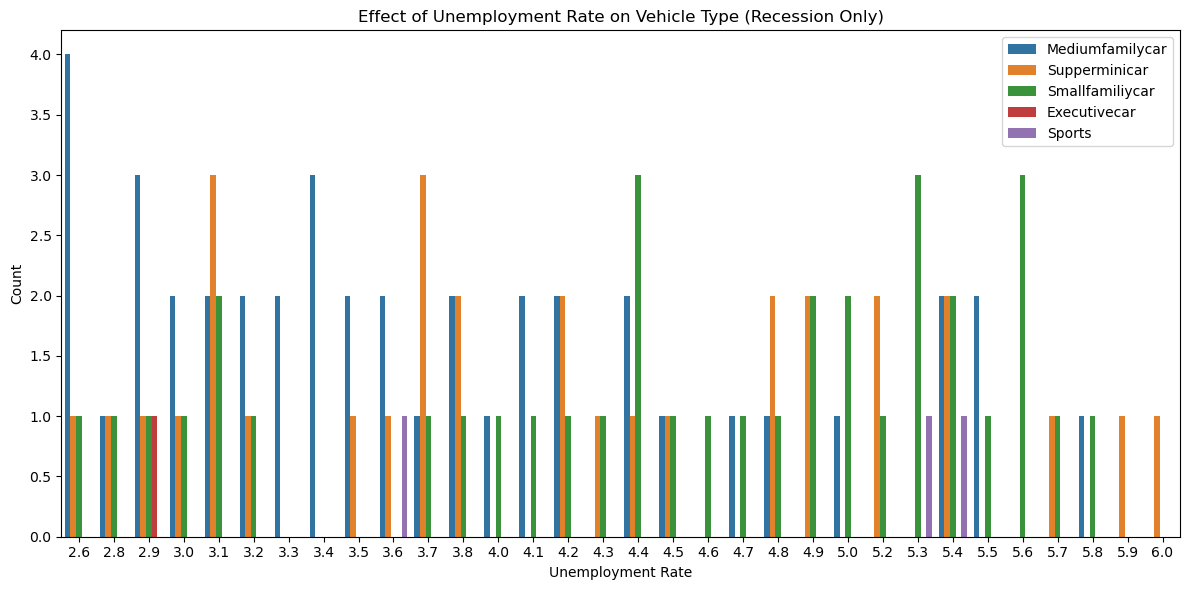

In [36]:
# Filter recession period only
data = df[df['Recession'] == 1].copy()

plt.figure(figsize=(12,6))
sns.countplot(data=data, x='unemployment_rate', hue='Vehicle_Type')

plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type (Recession Only)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('countplot_unemployment_raw.png', dpi=150)
plt.show()

### Task 1.10 â€” Create a map on the hightest sales region/offices of the company during recession period

In [37]:
# Download the geojson file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json"
filename = "us-states.json"

response = requests.get(url)
if response.status_code == 200:
    with open(filename, "wb") as f:
        f.write(response.content)
    print("File downloaded successfully:", filename)
else:
    print("Failed to download file:", response.status_code)

File downloaded successfully: us-states.json


----------
## ðŸŽ‰ Congratulations!
You have successfully completed the lab.

--------


Â© 2023 IBM Corporation. All rights reserved.

---
